# Choose Shapefile

Department 35-00016 came with multiple shapefiles. Let's understand what those mean and choose one to keep going with the project. *I could choose to work with the 3*, but this would result in complications down the road. For example, we just want to be working with one police precincts file for each department at once.

In [1]:
import fiona
import geopandas
import matplotlib.pyplot as plt

from cpe_help import Department, list_departments


%matplotlib inline

In [2]:
# check if it is only department 35-00016 that has multiple shapefiles

for dept in list_departments():
    print('', dept.full_name, fiona.listlayers(str(dept.external_shapefile_path)))

 11-00091 (Boston, MA) ['boston_police_districts_f55']
 23-00089 (Lawrence, IN) ['Indianapolis_Police_Zones']
 24-00013 (Minneapolis, MN) ['Minneapolis_Police_Precincts']
 24-00098 (St. Paul, MN) ['StPaul_geo_export_6646246d-0f26-48c5-a924-f5a99bb51c47']
 35-00016 (Orlando, FL) ['OrlandoPoliceDistricts', 'OrlandoPoliceDivisions', 'OrlandoPoliceSectors']
 35-00103 (Charlotte, NC) ['CMPD_Police_Division_Offices']
 37-00027 (Austin, TX) ['APD_DIST']
 37-00049 (Dallas, TX) ['EPIC']
 49-00009 (Seattle, WA) ['SPD_BEATS_WGS84']
 49-00033 (Los Angeles, CA) ['lapd division']
 49-00035 (Oakland, CA) ['Oakland_geo_export_e0633584-8d50-406e-b9d6-e33545fdae16']
 49-00081 (San Francisco, CA) ['SFPD_geo_export_8a7e3c3b-8d43-4359-bebe-b7ef6a6e21f3']


Only department 35-00016 has multiple shapefiles (3, to be exact).

# Load shapefiles

Let's load the shapefiles into differents GeoDataFrames, before we can examine them.

In [3]:
dept = Department('35-00016')
path = str(dept.external_shapefile_path)

frames = []
for layer in fiona.listlayers(path):
    print(f" Loading layer {layer!r}")
    frames.append(geopandas.read_file(path, layer=layer))
    
districts, divisions, sectors = frames

 Loading layer 'OrlandoPoliceDistricts'
 Loading layer 'OrlandoPoliceDivisions'
 Loading layer 'OrlandoPoliceSectors'


# Summary of shapefiles

Seems like the order is:

`Division > Sector > District`

In [4]:
divisions.shape

(6, 4)

In [5]:
sectors.shape

(10, 4)

In [6]:
districts.shape

(71, 7)

# Plot shapefiles

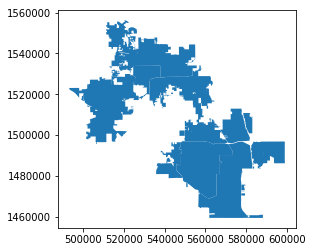

In [7]:
divisions.plot();

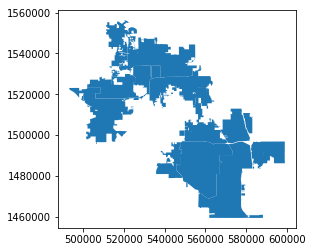

In [8]:
sectors.plot();

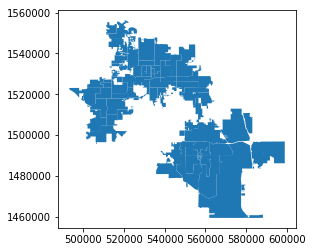

In [9]:
districts.plot();

# Plot shapefiles (side by side)

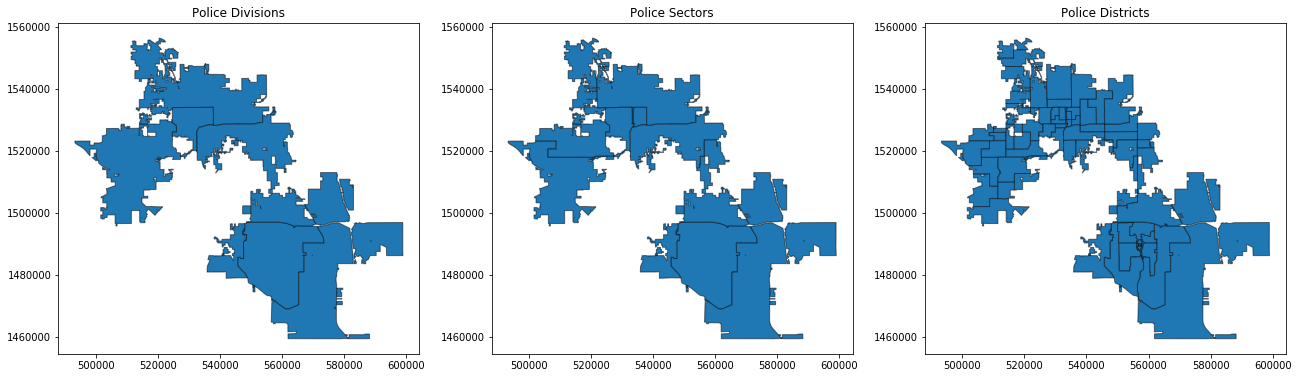

In [10]:
fig, axes = plt.subplots(ncols=3, figsize=(22, 12))

for ax in axes:
    ax.set_aspect('equal')

ec = (0,0,0,0.5)
divisions.plot(ax=axes[0], edgecolor=ec)
sectors.plot(ax=axes[1], edgecolor=ec)
districts.plot(ax=axes[2], edgecolor=ec)

axes[0].set_title('Police Divisions')
axes[1].set_title('Police Sectors')
axes[2].set_title('Police Districts');

By comparing the maps side by side, you can see that sectors are subdivisions of the "divisions" and districts are subdivisions of the sectors. In the light of keeping results granular, I will stick to the Police Districts.

One thing that can be done further is assigning the sector and division for the districts, if this information is not already present:

In [11]:
districts.head()

,DISTRICT,Sector,Division,COLOR,OperatorID,MaintDate,geometry
0,C5,C,NORTH,13696976.0,None,None,"POLYGON ((540469.2300923973 1536617.262716767,..."
1,G7,G,WEST,16777104.0,None,None,"POLYGON ((514012.954921842 1524827.900141029, ..."
2,85,AP,AP,16756832.0,None,None,"POLYGON ((556615.9471422575 1489114.621503177,..."
3,87,AP,AP,16765160.0,None,None,"POLYGON ((556802.6511651669 1489576.659292999,..."
4,82,AP,AP,10551200.0,None,None,"POLYGON ((561961.360991932 1494191.636939524, ..."


And it is, so no need for it :D